# Importing

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generating the data

In [125]:
# Setting the seed
np.random.seed(1)

# Creating fake data
data1 = np.random.normal(loc=0.03, size=1000).cumsum()
data2 = np.random.normal(loc=0.01, size=1000).cumsum()

# Scaling the data
data1 = data1-data1[0] + 100
data2 = data2-data2[0] + 100

# Creating the datetime index
idx = pd.date_range(end='2020-04-05', periods=1000)

# Creating a dataframe
df = pd.DataFrame(data = {'stock1': data1, 'stock2': data2},
                  index = idx)

# Plotting the data

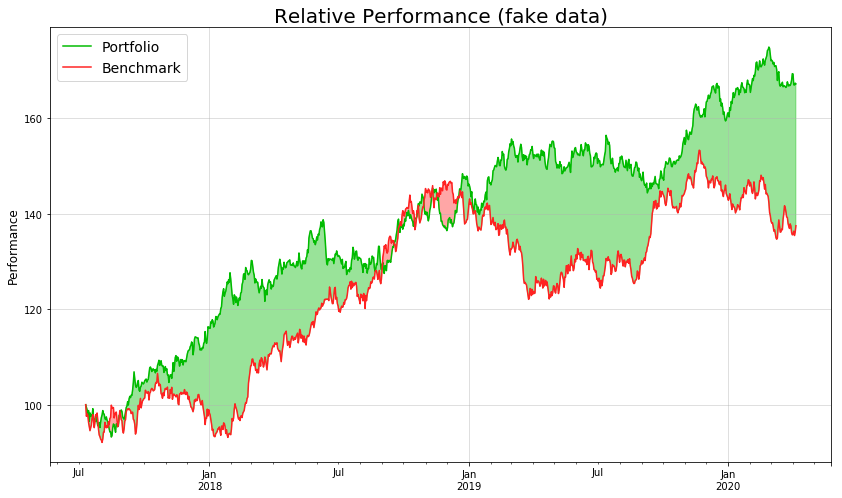

In [140]:
# Creating the figure and the axis
fig, ax = plt.subplots(figsize = (14,8))

# Plotting the lines
df['stock1'].plot(ax=ax, color='#00BB00', label='Portfolio')
df['stock2'].plot(ax=ax, color='#FF2222', label='Benchmark')

# Creating the masks
mask_greater = data1 > data2   
mask_smaller = ~ mask_greater

# Fill the area between the curves
ax.fill_between(df.index, data1, data2, where=mask_smaller, 
                color='#FF2222', alpha=0.4, interpolate=True)
ax.fill_between(df.index, data1, data2, where=mask_greater, 
                color='#00BB00', alpha=0.4, interpolate=True)

# Create a grid
ax.grid(alpha=0.5)

# Insert the legend
ax.legend(fontsize=14)

# Insert a title
ax.set_title("Relative Performance (fake data)", fontsize=20)

#Put a label on the y axis
ax.set_ylabel("Performance", fontsize=12)

# Show the image
plt.show()